# Drill 2.4.2 and Challenge 2.4.4

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns

New York State crime data from 2013 is provided by [the FBI: UCR](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls). ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

In [2]:
# Loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv')

In [3]:
# Taking a peek at dataframe
df.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [4]:
df.tail()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
350,Yonkers,"199,134","1,036",6,NaN,25,390,615,"2,368",470,"1,662",236,10
351,Yorktown Town,"36,643",15,0,NaN,0,2,13,334,45,287,2,NaN
352,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the dataset

In [5]:
# Removing info columns at head and tail of dataframe
df_raw = df[4:352]

# Renaming columns
df_raw.columns = ['City','Population','Violent_Crime','Murder','Rape_a','Rape_b','Robbery','Assault',
                  'Property_crime','Burglary','Larceny_theft','Auto_theft','Arson']

# Resetting index
df_raw.reset_index(drop=True)

,City,Population,Violent_Crime,Murder,Rape_a,Rape_b,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Auto_theft,Arson
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,10,0,0
7,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,"1,882",32,3
8,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,188,6,1
9,Amsterdam,"18,182",30,0,NaN,0,12,18,405,99,291,15,0


In [6]:
# Looking at data types.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 4 to 351
Data columns (total 13 columns):
City              348 non-null object
Population        348 non-null object
Violent_Crime     348 non-null object
Murder            348 non-null object
Rape_a            0 non-null object
Rape_b            348 non-null object
Robbery           348 non-null object
Assault           348 non-null object
Property_crime    348 non-null object
Burglary          348 non-null object
Larceny_theft     348 non-null object
Auto_theft        348 non-null object
Arson             187 non-null object
dtypes: object(13)
memory usage: 35.4+ KB


In [7]:
#Changing strings to ints for analysis

int_cols = ['Population','Violent_Crime','Murder','Rape_a','Rape_b','Robbery','Assault',
                  'Property_crime','Burglary','Larceny_theft','Auto_theft','Arson']

# For column that has data stored as a string instead of a number, remove '$', the comma, and convert it to a number.
for x in int_cols:
    df_raw[x] = df_raw[x].str.replace(",","")
    df_raw[x] = pd.to_numeric(df_raw[x])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Creating the dataframe for Analysis
Creating dataframe specific to Drill 2.4.2 to model a multivariable regression according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

**Assignment, for reference:**
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [8]:
df1 = df_raw.loc[:,['City','Population','Murder','Robbery','Property_crime']]

In [9]:
df1['Murder_binary'] = np.where(df1.loc[:, 'Murder']>=1, 1, 0)
df1['Robbery_binary'] = np.where(df1.loc[:, 'Robbery']>=1, 1, 0)

In [10]:
df1.head()

,City,Population,Murder,Robbery,Property_crime,Murder_binary,Robbery_binary
4,Adams Village,1861,0,0,12,0,0
5,Addison Town and Village,2577,0,0,24,0,0
6,Akron Village,2846,0,0,16,0,0
7,Albany,97956,8,227,4090,1,1
8,Albion Village,6388,0,4,223,0,1


## Data Exploration

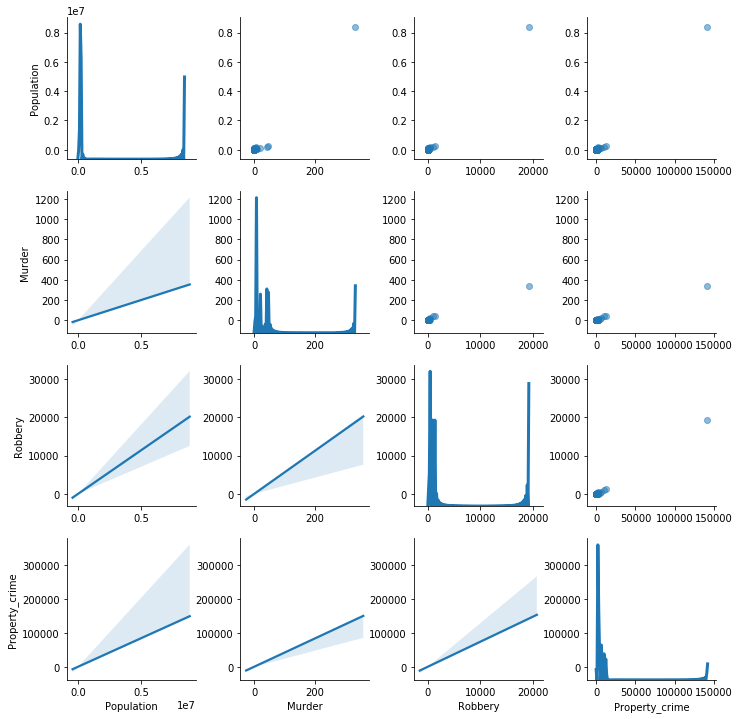

In [11]:
df_explore = df1.loc[:, 'Population':'Property_crime'].dropna()

# Scatterplot matrix
g = sns.PairGrid(df_explore, diag_sharey=False)

#Scatterplots
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing linear relationship of two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Univariate distribtuion of the variables
g.map_diag(sns.kdeplot, lw=3)

plt.show()

Outliers. Fun.

In [12]:
df1.describe()

,Population,Murder,Robbery,Property_crime,Murder_binary,Robbery_binary
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,1.566092,72.902299,792.606322,0.140805,0.600575
std,4.500374e+05,18.303673,1031.032873,7659.724746,0.348321,0.490486
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,0.000000,0.000000,40.500000,0.000000,0.000000
50%,7.233500e+03,0.000000,1.000000,112.500000,0.000000,1.000000
75%,1.842750e+04,0.000000,5.000000,341.000000,0.000000,1.000000
max,8.396126e+06,335.000000,19170.000000,141971.000000,1.000000,1.000000


In [13]:
df1[df1['Robbery'] > 5000]

,City,Population,Murder,Robbery,Property_crime,Murder_binary,Robbery_binary
220,New York,8396126,335,19170,141971,1,1


It looks like New York, New York is the outlier.  Seeing as it is so extreme in all cases compared to the other cities in New York, I am going to drop this datapoint.

In [14]:
df1 = df1.drop([220])

In [15]:
df1.describe()

,Population,Murder,Robbery,Property_crime,Murder_binary,Robbery_binary
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,15956.685879,0.605187,17.867435,385.752161,0.138329,0.599424
std,27080.218837,3.707090,94.972492,1034.369072,0.345743,0.490723
min,526.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2997.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,7187.000000,0.000000,1.000000,112.000000,0.000000,1.000000
75%,18160.500000,0.000000,5.000000,340.500000,0.000000,1.000000
max,258789.000000,47.000000,1322.000000,12491.000000,1.000000,1.000000


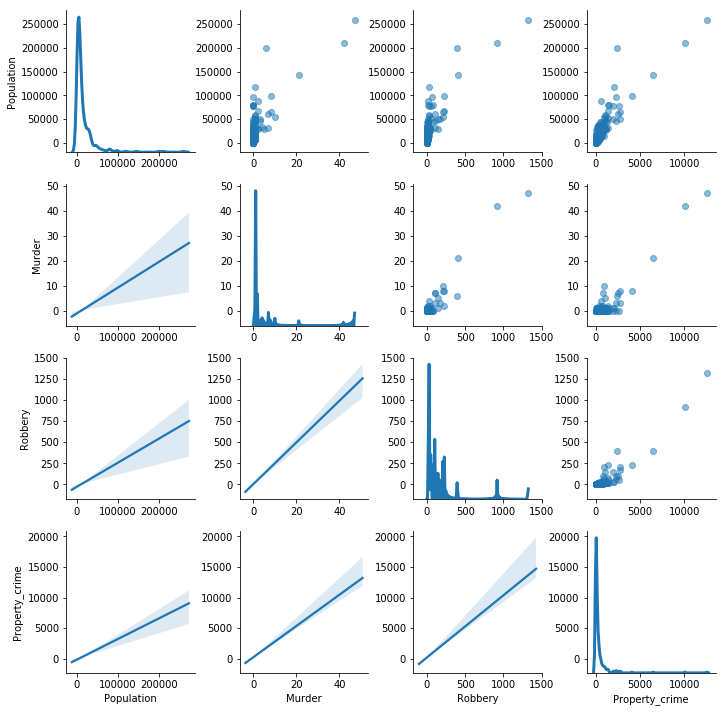

In [16]:
df_explore = df1.loc[:, 'Population':'Property_crime'].dropna()

# Scatterplot matrix
g = sns.PairGrid(df_explore, diag_sharey=False)

#Scatterplots
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing linear relationship of two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Univariate distribtuion of the variables
g.map_diag(sns.kdeplot, lw=3)

plt.show()

Better.

# Challenge 2.4.4
Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

#### Model 1
This model makes use of the murder and robbery binary columns that we engineered.

In [17]:
from sklearn import linear_model

# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = df1['Property_crime'].values.reshape(-1,1)
X = df1[['Population','Murder_binary','Robbery_binary']]
regr.fit(X,Y)

# Results
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  3.43860764e-02   1.43473775e+01  -9.42521334e+01]]

Intercept: 
 [-108.42335403]

R-squared:
0.788942800091


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


#### Model 2
The model just uses un-transformed Murder and Robbery numbers.

In [48]:
# Instantiate and fit model
regr2 = linear_model.LinearRegression()
Y2 = df1['Property_crime'].values.reshape(-1,1)
X2 = df1[['Population','Murder','Robbery']]
regr2.fit(X2,Y2)

# Results
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr2.score(X2, Y2))


Coefficients: 
 [[  1.58354338e-02   1.18437047e+02   2.02472175e+00]]

Intercept: 
 [ 25.21793454]

R-squared:
0.930558620639


#### Model 3

Because the value ditribution of Property Crime is not normal, I am going to try to transform it with logs.

In [19]:
df1['log_propcrime'] = np.log(df1['Property_crime'] + 1)

# Instantiate and fit model
regr3 = linear_model.LinearRegression()
Y3 = df1['log_propcrime'].values.reshape(-1,1)
X3 = df1[['Population','Murder','Robbery']]
regr3.fit(X3,Y3)

# Results
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr3.score(X3, Y3))


Coefficients: 
 [[  6.01285392e-05   4.07043431e-02  -8.95301297e-03]]

Intercept: 
 [ 3.88783989]

R-squared:
0.464407419927


## Conclusion
Model 2 did the best, with an R Squared of 0.93.  This means that this model explained the most variance of the three models.

### Questions
- What about population^2
- How do you interpret the population coefficient of 1.58e-02

# Challenge: Validating a linear regression

Statistical tests are useful for making sure a model is a good fit to the test data, and that all the features are useful to the model. However, to make sure a model has good predictive validity for new data, it is necessary to assess the performance of the model on new datasets.

We'll use the property crime model you've been working on with, based on the FBI:UCR data. Since your model formulation to date has used the entire New York State 2013 dataset, you'll need to validate it using some of the other crime datasets available at the FBI:UCR website. Options include other states crime rates in 2013 or crime rates in New York State in other years or a combination of these.

## Iterate
Based on the results of your validation test, create a revised model, and then test both old and new models on a new holdout or set of folds.

Include your model(s) and a brief writeup of the reasoning behind the validation method you chose and the changes you made to submit and review with your mentor.

In [29]:
# Loading test data
data14 = pd.read_csv('datafiles/NYC_2014_Crimes.csv', encoding='iso-8859-1')

In [30]:
data14.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851,0,0,NaN,0.0,0,0,11.0,1,10.0,0,0.0
1,Addison Town and Village,2568,2,0,NaN,0.0,1,1,49.0,1,47.0,1,0.0
2,Afton Village4,820,0,0,0.0,NaN,0,0,1.0,0,1.0,0,0.0
3,Akron Village,2842,1,0,NaN,0.0,0,1,17.0,0,17.0,0,0.0
4,Albany4,98595,802,8,54.0,NaN,237,503,3888.0,683,3083.0,122,12.0


In [38]:
data14.tail()

,City,Population,Violent_Crime,Murder,Rape_a,Rape_b,Robbery,Assault,Property_crime,Burglary,Larceny_theft,Auto_theft,Arson
364,"Woodbury Town4, 5",10739,4,0,0.0,NaN,1,3,NaN,5,NaN,0,0.0
365,Woodstock Town4,5907,3,0,1.0,NaN,2,0,43.0,14,29.0,0,0.0
366,Yonkers4,200624,974,3,33.0,NaN,358,580,2009.0,414,1395.0,200,15.0
367,Yorktown Town4,36989,13,0,0.0,NaN,0,13,209.0,24,182.0,3,0.0
368,Youngstown Village4,1896,0,0,0.0,NaN,0,0,1.0,0,1.0,0,0.0


In [32]:
# Renaming columns
data14.columns = ['City','Population','Violent_Crime','Murder','Rape_a','Rape_b','Robbery','Assault',
                  'Property_crime','Burglary','Larceny_theft','Auto_theft','Arson']

In [33]:
# Looks like they are already ints and floats. Hooray!
data14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 13 columns):
City              369 non-null object
Population        369 non-null int64
Violent_Crime     369 non-null int64
Murder            369 non-null int64
Rape_a            227 non-null float64
Rape_b            142 non-null float64
Robbery           369 non-null int64
Assault           369 non-null int64
Property_crime    368 non-null float64
Burglary          369 non-null int64
Larceny_theft     368 non-null float64
Auto_theft        369 non-null int64
Arson             365 non-null float64
dtypes: float64(5), int64(7), object(1)
memory usage: 37.6+ KB


In [58]:
# For consistency, dropping NYC
data14 = data14.drop(data14['City'] == 'New York')

In [59]:
# Creating dataframe for testing
test = data14.loc[:,['Population','Murder','Robbery','Property_crime']]

In [60]:
test.tail()

,Population,Murder,Robbery,Property_crime
364,10739,0,1,NaN
365,5907,0,2,43.0
366,200624,3,358,2009.0
367,36989,0,0,209.0
368,1896,0,0,1.0


In [61]:
# Dropping rows with NaN for property crime.
test = test.dropna(subset=['Property_crime'])

In [63]:
test_pred = regr2.predict(test)

ValueError: shapes (367,4) and (3,1) not aligned: 4 (dim 1) != 3 (dim 0)